In [1]:
import pandas as pd
import numpy as np

In [2]:
incell_recalc_shape_reac = pd.read_csv('../../../incell_recalc_SHAPE_reac.txt',sep="\t",header=0,index_col=0)
exvivo_recalc_shape_reac = pd.read_csv('../../../exvivo_recalc_SHAPE_reac.txt',sep="\t",header=0,index_col=0)

In [3]:
header_list=['Nucleotide number','SHAPE reactivity','Estimated SE','Nucleotide identity']

incell_rep1_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_incell_1M7_rep1.map',sep="\t", names=header_list,index_col=0)
incell_rep2_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_incell_1M7_rep2.map',sep="\t", names=header_list,index_col=0)

exvivo_rep1_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_exvivo_1M7_rep1.map',sep="\t", names=header_list,index_col=0)
exvivo_rep2_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_exvivo_1M7_rep2.map',sep="\t", names=header_list,index_col=0)

incell_rep1_shape_reac_provided_by_weeks = incell_rep1_shape_reac_provided_by_weeks.drop(incell_rep1_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)
incell_rep2_shape_reac_provided_by_weeks = incell_rep2_shape_reac_provided_by_weeks.drop(incell_rep2_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)

exvivo_rep1_shape_reac_provided_by_weeks = exvivo_rep1_shape_reac_provided_by_weeks.drop(exvivo_rep1_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)
exvivo_rep2_shape_reac_provided_by_weeks = exvivo_rep2_shape_reac_provided_by_weeks.drop(exvivo_rep2_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)


#incell_rep1_shape_reac_provided_by_weeks= incell_rep1_shape_reac_provided_by_weeks.reset_index()
#incell_rep2_shape_reac_provided_by_weeks= incell_rep2_shape_reac_provided_by_weeks.reset_index()

#exvivo_rep1_shape_reac_provided_by_weeks= exvivo_rep1_shape_reac_provided_by_weeks.reset_index()
#exvivo_rep2_shape_reac_provided_by_weeks= exvivo_rep2_shape_reac_provided_by_weeks.reset_index()

In [4]:
print(incell_recalc_shape_reac.head())

   in_cell_recalc_SHAPE_reac_rep1  in_cell_recalc_SHAPE_reac_rep2
1                             0.0                             0.0
2                             0.0                             0.0
3                             0.0                             0.0
4                             0.0                             0.0
5                             0.0                             0.0


In [5]:
print(exvivo_recalc_shape_reac.head())

   ex_vivo_recalc_SHAPE_reac_rep1  ex_vivo_recalc_SHAPE_reac_rep2
1                             0.0                             0.0
2                             0.0                             0.0
3                             0.0                             0.0
4                             0.0                             0.0
5                             0.0                             0.0


In [6]:
#incell_rep1_shape_reac_provided_by_weeks= incell_rep1_shape_reac_provided_by_weeks.reset_index()
print(incell_rep1_shape_reac_provided_by_weeks.tail())

                   SHAPE reactivity
Nucleotide number                  
17914                        -999.0
17915                        -999.0
17916                        -999.0
17917                        -999.0
17918                        -999.0


In [7]:
df = pd.DataFrame(index=np.arange(17918), columns=['nucleotide',
    'recalc_SHAPEreac_rep1_incell', 'recalc_SHAPEreac_rep2_incell', 'recalc_SHAPEreac_rep1_exvivo', 'recalc_SHAPEreac_rep2_exvivo',
    'WEEKS_SHAPEreac_rep1_incell', 'WEEKS_SHAPEreac_rep2_incell', 'WEEKS_SHAPEreac_rep1_exvivo', 'WEEKS_SHAPEreac_rep2_exvivo'])


df = df.fillna(0) # with 0s rather than NaNs
interm_df_for_nucle_column= incell_rep1_shape_reac_provided_by_weeks.copy()
interm_df_for_nucle_column= interm_df_for_nucle_column.reset_index()

df["nucleotide"] = interm_df_for_nucle_column["Nucleotide number"]
df = df.set_index('nucleotide')

In [8]:

df["recalc_SHAPEreac_rep1_incell"] = incell_recalc_shape_reac["in_cell_recalc_SHAPE_reac_rep1"]
df["recalc_SHAPEreac_rep2_incell"] = incell_recalc_shape_reac["in_cell_recalc_SHAPE_reac_rep2"]


df["recalc_SHAPEreac_rep1_exvivo"] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep1"]
df["recalc_SHAPEreac_rep2_exvivo"] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep2"]


df["WEEKS_SHAPEreac_rep1_incell"] = incell_rep1_shape_reac_provided_by_weeks["SHAPE reactivity"]
df["WEEKS_SHAPEreac_rep2_incell"] = incell_rep2_shape_reac_provided_by_weeks["SHAPE reactivity"]

df["WEEKS_SHAPEreac_rep1_exvivo"] = exvivo_rep1_shape_reac_provided_by_weeks["SHAPE reactivity"]
df["WEEKS_SHAPEreac_rep2_exvivo"] = exvivo_rep2_shape_reac_provided_by_weeks["SHAPE reactivity"]



#df["recalc_SHAPEreac_rep1_exvivo"].loc[exvivo_recalc_shape_reac.index] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep1"]
#df["recalc_SHAPEreac_rep2_exvivo"].loc[exvivo_recalc_shape_reac.index] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep2"]





In [9]:
df

,recalc_SHAPEreac_rep1_incell,recalc_SHAPEreac_rep2_incell,recalc_SHAPEreac_rep1_exvivo,recalc_SHAPEreac_rep2_exvivo,WEEKS_SHAPEreac_rep1_incell,WEEKS_SHAPEreac_rep2_incell,WEEKS_SHAPEreac_rep1_exvivo,WEEKS_SHAPEreac_rep2_exvivo
nucleotide,,,,,,,,
1,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
2,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
3,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
4,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
5,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
6,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
7,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
8,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
9,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0


In [10]:
#Replace -999.0 for SHAPE reac by 0
df=df.replace(-999, 0)

In [11]:
df=df.reset_index()

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['recalc_SHAPEreac_rep1_incell'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['recalc_SHAPEreac_rep1_incell'])))
print("Position " +str(int(df.iloc[df['recalc_SHAPEreac_rep1_incell'].argmax()][0])))
print('INCELL_REP1_RECALC')

Max SHAPE REAC 23.7667897225909
Position 6220
INCELL_REP1_RECALC


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  # Remove the CWD from sys.path while we load stuff.


Max SHAPE REAC 32.258086078299996
Position 6220
INCELL_REP1_WEEKS


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


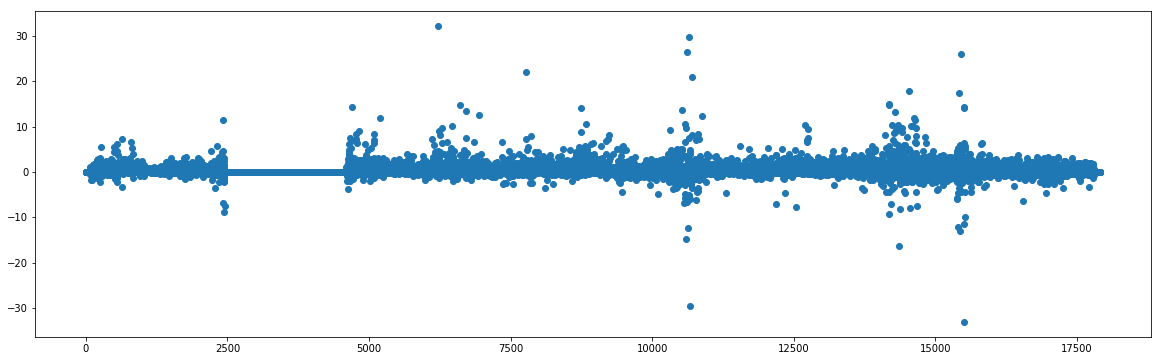

In [13]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['WEEKS_SHAPEreac_rep1_incell'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['WEEKS_SHAPEreac_rep1_incell'])))
print("Position " +str(int(df.iloc[df['WEEKS_SHAPEreac_rep1_incell'].argmax()][0])))
print('INCELL_REP1_WEEKS')


Max SHAPE REAC 112.377736283885
Position 14112
INCELL_REP2_RECALC


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


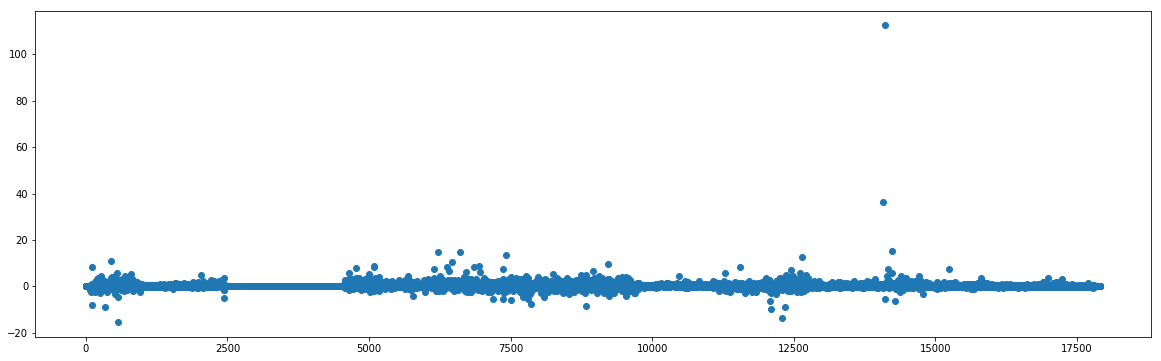

In [14]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['recalc_SHAPEreac_rep2_incell'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['recalc_SHAPEreac_rep2_incell'])))
print("Position " +str(int(df.iloc[df['recalc_SHAPEreac_rep2_incell'].argmax()][0])))
print('INCELL_REP2_RECALC')


Max SHAPE REAC 41.5981119503
Position 14244
INCELL_REP2_WEEKS


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


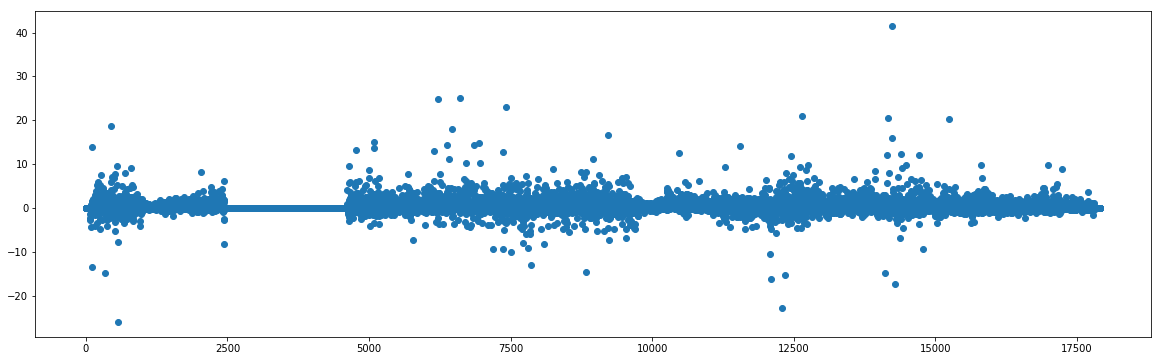

In [15]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['WEEKS_SHAPEreac_rep2_incell'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['WEEKS_SHAPEreac_rep2_incell'])))
print("Position " +str(int(df.iloc[df['WEEKS_SHAPEreac_rep2_incell'].argmax()][0])))
print('INCELL_REP2_WEEKS')


Max SHAPE REAC 113.843653661879
Position 8795
EXVIVO_REP1_RECALC


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


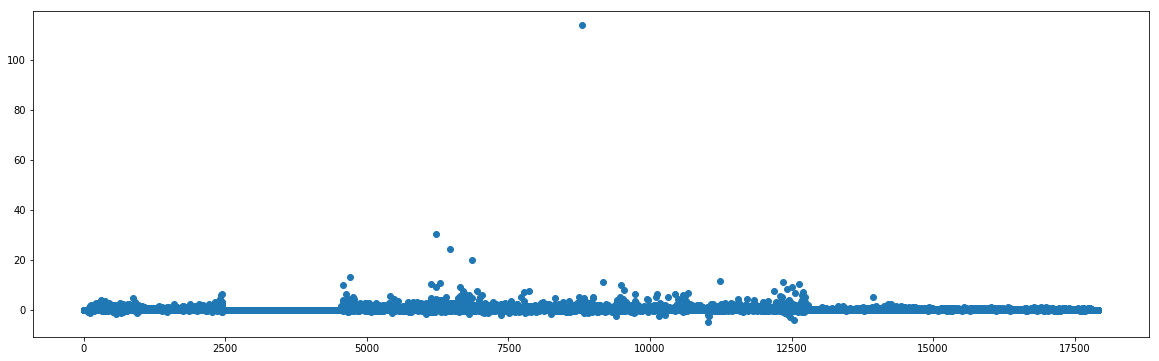

In [16]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['recalc_SHAPEreac_rep1_exvivo'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['recalc_SHAPEreac_rep1_exvivo'])))
print("Position " +str(int(df.iloc[df['recalc_SHAPEreac_rep1_exvivo'].argmax()][0])))
print('EXVIVO_REP1_RECALC')

Max SHAPE REAC 47.798865954499995
Position 6220
EXVIVO_REP1_WEEKS


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


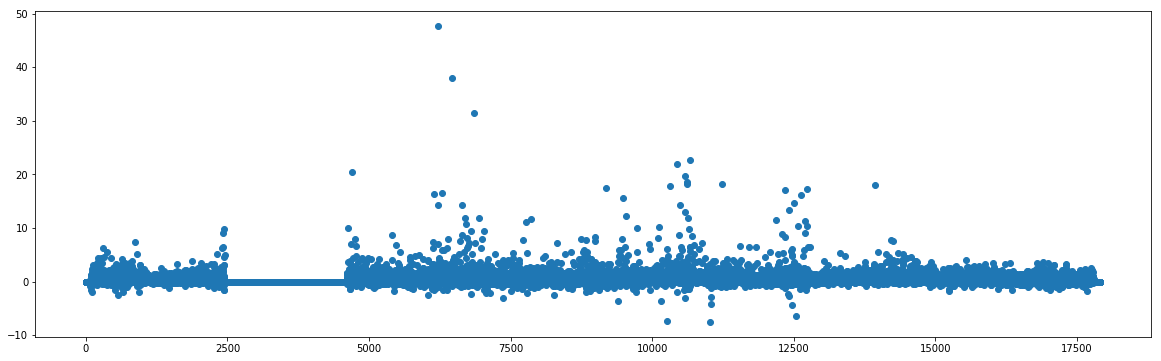

In [17]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['WEEKS_SHAPEreac_rep1_exvivo'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['WEEKS_SHAPEreac_rep1_exvivo'])))
print("Position " +str(int(df.iloc[df['WEEKS_SHAPEreac_rep1_exvivo'].argmax()][0])))
print('EXVIVO_REP1_WEEKS')

Max SHAPE REAC 20.2579496876773
Position 6602
EXVIVO_REP2_RECALC


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


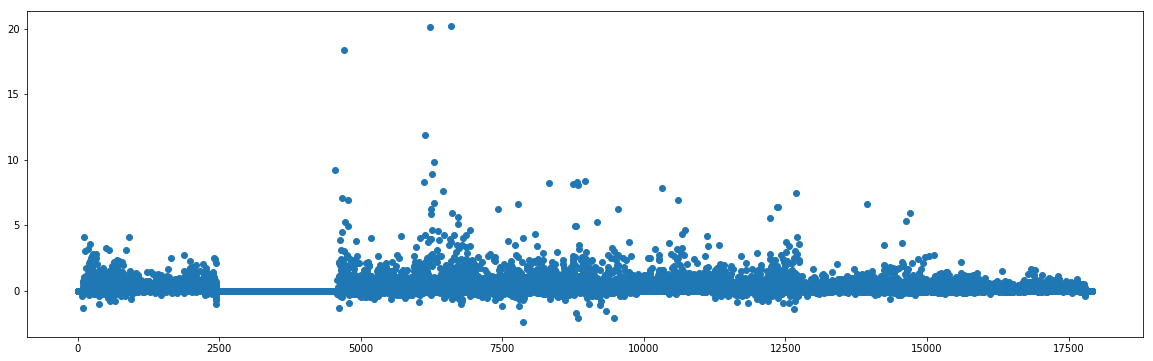

In [18]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['recalc_SHAPEreac_rep2_exvivo'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['recalc_SHAPEreac_rep2_exvivo'])))
print("Position " +str(int(df.iloc[df['recalc_SHAPEreac_rep2_exvivo'].argmax()][0])))
print('EXVIVO_REP2_RECALC')


Max SHAPE REAC 32.1703944212
Position 6602
EXVIVO_REP2_WEEKS


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


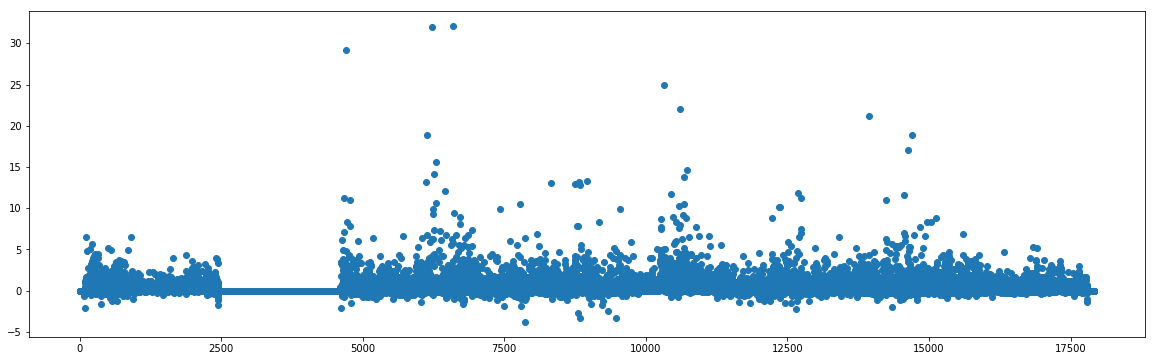

In [19]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

ax.scatter(df['nucleotide'], df['WEEKS_SHAPEreac_rep2_exvivo'])

#plt.figure(figsize=(100, 6))
print("Max SHAPE REAC " + str(max(df['WEEKS_SHAPEreac_rep2_exvivo'])))
print("Position " +str(int(df.iloc[df['WEEKS_SHAPEreac_rep2_exvivo'].argmax()][0])))
print('EXVIVO_REP2_WEEKS')
